In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive

In [ ]:
!git clone https://github.com/ultralytics/yolov3

In [ ]:
%cd /content/drive/My Drive/yolov3     #미리 clone 해 놓은 yolov3 파일로 이동

/content/drive/.shortcut-targets-by-id/11UcUrgtesu5x9q6BIsR_d_NtB_2qETHB/yolov3


1. data 폴더의 custom 폴더 안에 images와 labels 폴더 만들고 images와 labels 넣기
2. custom 폴더 안에 classes.names 파일을 생성. 39개의 class 이름 적어주기, custom.data 파일을 생성하여 class개수와 train set과 valid set이 있는 경로(train.txt, valid.txt) 적어주기 
3. train.txt와 valid.txt는 미리 정해둔 train set과 valid set의 image가 있는 경로 적기
4. weights는 darknet weight으로 돌리다가 epoch 돌면서 weight 저장되면 last.pt weight으로 학습시키기


In [ ]:
#batch 크게하면 시간이 오래 소요되어서 batch size는 4로 설정, 기본 yolov3 활용
!python3 train.py --cfg cfg/yolov3.cfg --data data/custom/custom.data --weights weights/last.pt --batch-size 4   

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 1 commit, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3.cfg', data='data/custom/custom.data', device='', epochs=300, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-08-30 23:45:53.005825: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.17284e+07 parameters, 6.17284e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
Caching labels data/cust

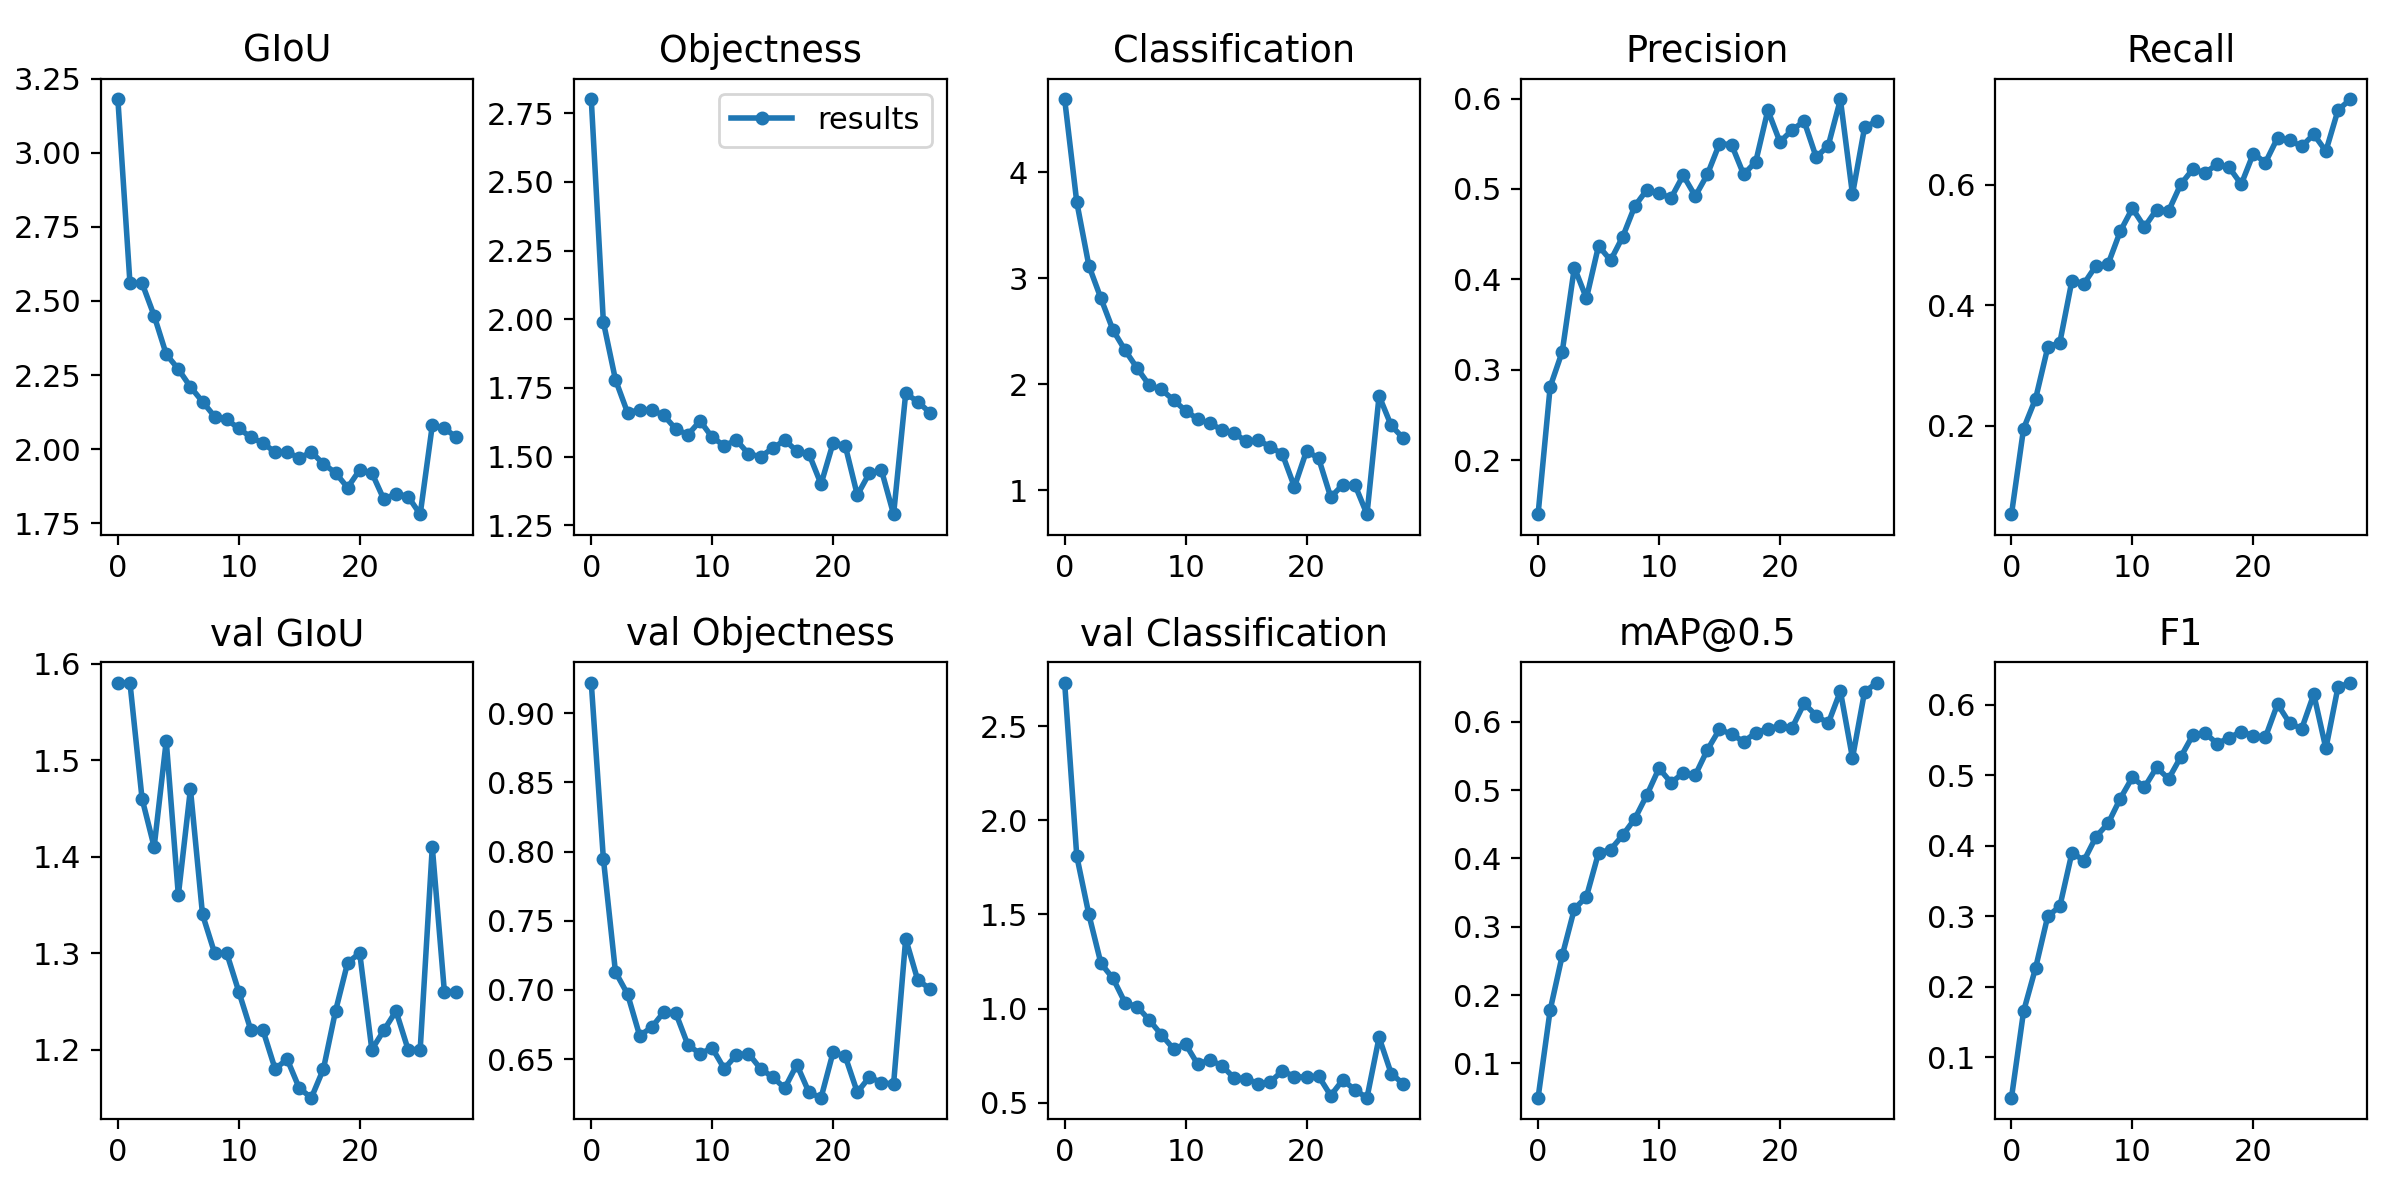

In [ ]:
#train set 학습 결과 그래프
from PIL import Image
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image.open('results.png')

In [ ]:
# 학습한 결과 test set에 적용하여 성능 보기
!python3 test.py --cfg yolov3.cfg --data data/custom/custom.data --weights weights/best.pt

Namespace(augment=False, batch_size=16, cfg='./cfg/yolov3.cfg', conf_thres=0.001, data='data/custom/custom.data', device='', img_size=512, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 222 layers, 6.17284e+07 parameters, 6.17284e+07 gradients
Fusing layers...
Model Summary: 150 layers, 6.17021e+07 parameters, 6.17021e+07 gradients
Caching labels data/custom/labels.npy (10517 found, 0 missing, 9 empty, 0 duplicate, for 10526 images): 100% 10526/10526 [00:00<00:00, 20350.15it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/658 [00:00<?, ?it/s]/content/drive/.shortcut-targets-by-id/11UcUrgtesu5x9q6BIsR_d_NtB_2qETHB/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally 